In [1107]:
import numpy as np
import pandas as pd

In [1108]:
rho_tank=4500 #kg/m3
m=24/86400#ton/s
P=410#bar
T=273.15+25
T1=T
Tref=10+273.15
Po=31

In [1109]:
import pandas as pd
crit=pd.DataFrame()
crit['Comp']=['H2']
crit['Tc']=[32.938]
crit['Pc']=[1293.00]
crit['w']=[-0.2160]
crit['PM']=[1.00784*2]
T=298
#P1=100
def PRv2(Tc,Pc,mm,w,T,P):
    #Unidades: P, Pc: kPa, T, Tc: K, w: Adim, mm: kg/kmol
    R=8.314#J/mol-K
    Ru=R/mm
    mi=0.379642+1.48503*w-0.164423*w**2+0.016666*w**3
    alpha=(1+mi*(1-(T/Tc)**0.5))**2
    a=0.45724*((Ru)**2)*(Tc**2)*alpha/(Pc)
    b=0.0778*(Ru)*(Tc/Pc)
    A_may=a*P/(((Ru)**2)*(T**2))
    B_may=b*P/((Ru)*T)
    m=-(1-B_may)
    n=(A_may-(3*B_may**2)-(2*B_may))
    o=-((A_may*B_may)-(B_may**2)-(B_may**3))
    v=(Ru*T)/P
    return {'alpha':alpha,'a':a,'b':b,'A':A_may,'B':B_may,'m':m,'n':n,'o':o,'v':v}
resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],316+273.15,172.37*100)
z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
#r1=(P1*crit['PM'][0])/(z*(8.314)*(T+273.15))
#V1=m/r1
#V1

In [1110]:
import numpy as np
from scipy.optimize import root
def trabajo_reversible(m, P1, P2, eta, T2,T1):
    P1=P1*100
    P2=P2*100
    
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T1,P1)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r1=(P1*crit['PM'][0])/(z*(8.314)*T1)
    
    V1=1/r1
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T2+273.15,P2)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r2=(P2*crit['PM'][0])/(z*(8.314)*(T2+273.15))
    V2=1/r2
    n = np.log(P2/P1)/(np.log((V1)/(V2)))
    
    term1 = (m * P1 * 1000 * V1) / (0.72*(n - 1)/n)
    term2 = (P2 / P1) ** ((n - 1) / n) - 1
    W_rev=term1*term2/1000
    return W_rev/eta

def trabajo_reversible_IT(tt, m, P1, P2, eta,T1):
    P1=P1*100
    P2=P2*100
    T2=abs(tt[0])

    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T1,P1)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r1=(P1*crit['PM'][0])/(z*(8.314)*T1)

    V1=1/r1
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T2,P2)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r2=(P2*crit['PM'][0])/(z*(8.314)*(T2))
    V2=1/r2
    n = np.log(P2/P1)/(np.log((V1)/(V2)))
    
    term1 = (1 * P1 * V1 * 1000) / (0.72*(n - 1)/n)
    term2 = (P2 / P1) ** ((n - 1) / n) - 1
    Tref=T1
    T=T2
    HhH2=(19.67099783*(T-Tref) + 0.069681519/2*(T**2-Tref**2) - 0.000200098/3*(T**3-Tref**3) + 2.89493E-07/4*(T**4-Tref*4) - 2.22475E-10/5*(T**5-Tref**5) + 8.81466E-14/6*(T**6-Tref**6) - 1.42043E-17/7*(T**6-Tref**6))/2
    HhH2=HhH2
    T=T1
    HhH1=(19.67099783*(T-Tref) + 0.069681519/2*(T**2-Tref**2) - 0.000200098/3*(T**3-Tref**3) + 2.89493E-07/4*(T**4-Tref*4) - 2.22475E-10/5*(T**5-Tref**5) + 8.81466E-14/6*(T**6-Tref**6) - 1.42043E-17/7*(T**6-Tref**6))/2
    HhH1=HhH1
    W_rev=term1*term2/1000
    print('kW',W_rev)
    return W_rev - (HhH2 - HhH1)

P1=31
P2=141.82
m=m
eta=0.75
sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
if sol.success:
    print(sol.message)
else:
    print(sol.message)

resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
print(f"W: {resultado:.20f} kW")
sol.x-273.15

kW 3496.8473861408834
kW 3496.8473861408834
kW 3496.8473861408834
kW 3496.84741376228
kW 3677.64368506432
kW 3676.072128824285
kW 3676.08623771237
kW 3676.086238880761
The solution converged.
W: 1.36151342180768941681 kW


array([275.93059926])

In [1111]:
Tref

283.15

In [1112]:
import numpy as np
from scipy.optimize import root

def balance(x, T, Tref, m):
    global e
    global s
    """
    Calcula la función de balance para el proceso,
    devolviendo la diferencia e - s.

    Parámetros:
      x    : vector de incógnitas; se asume que x[0] es la variable a encontrar.
      T    : temperatura en K.
      Tref : temperatura de referencia en K.
      m    : masa del hidrógeno (kg).

    La función utiliza dos series polinómicas (para H2 y H2O)
    para calcular, respectivamente, las energías 'e' y 's', y retorna e - s.
    """
    # Calcular la entalpía (u otra propiedad) para hidrógeno
    Ta=15+273.15
    Ts=92+273.15
    HhH2 = ( 19.67099783*(T - Tref)
              + (0.069681519/2) * (T**2 - Tref**2)
              - (0.000200098/3) * (T**3 - Tref**3)
              + (2.89493E-07/4) * (T**4 - Tref**4)
              - (2.22475E-10/5) * (T**5 - Tref**5)
              + (8.81466E-14/6) * (T**6 - Tref**6)
              - (1.42043E-17/7) * (T**7 - Tref**7)
            ) / 2
    

    # Calcular la entalpía (u otra propiedad) para agua (H2O)
    HhH2O = ( -22.41701677*(Ta - Tref)
               + (0.876972156/2) * (Ta**2 - Tref**2)
               - (0.002570393/3) * (Ta**3 - Tref**3)
               + (2.48383E-06/4) * (Ta**4 - Tref**4)
             ) / 18.015
    Tk=25+273.15
    HhH22 = ( 19.67099783*(Tk - Tref)
              + (0.069681519/2) * (Tk**2 - Tref**2)
              - (0.000200098/3) * (Tk**3 - Tref**3)
              + (2.89493E-07/4) * (Tk**4 - Tref**4)
              - (2.22475E-10/5) * (Tk**5 - Tref**5)
              + (8.81466E-14/6) * (Tk**6 - Tref**6)
              - (1.42043E-17/7) * (Tk**7 - Tref**7)
            ) / 2
    

    # Calcular la entalpía (u otra propiedad) para agua (H2O)
    HhH2O2 = ( -22.41701677*(Ts - Tref)
               + (0.876972156/2) * (Ts**2 - Tref**2)
               - (0.002570393/3) * (Ts**3 - Tref**3)
               + (2.48383E-06/4) * (Ts**4 - Tref**4)
             ) / 18.015
    m=m*1e3
    s = (HhH22 + HhH2O2)* x[0]
    e = (HhH2 + HhH2O) * m
    
    return e - s


In [1113]:

import pandas as pd
import math

class PriceCalculator:
    def __init__(self, dataframe,spares,material):
        self.dataframe = dataframe
        self.spares = spares
        self.material = material
        self.calculate_price()

    def calculate_price(self):
        prices = []
        cepci_2001 = 397
        cepci_2024 = 798.8
        k1=2.2897
        k2=1.3604
        k3=-0.1027
        if self.material == "Carbon Steel":
            sFBM=3.4
        elif self.material == "Stainless Steel":
            sFBM=7.0
        else:
            sFBM=13.9 #for Nickel Alloy
        FBMCS=3.4 #for Carbon Steel

        for index, row in self.dataframe.iterrows():
            if index < len(self.dataframe) - 1:  # For all rows except the last one
                w_value = row["W (kW)"]
                A = k1+(k2*math.log10(w_value))+(k3*(math.log10(w_value)**2))
                B=(10**A)*(self.spares+1)/cepci_2001*cepci_2024
                price=B*sFBM/FBMCS
                prices.append(price)
            else:  # For the last row
                total_price = sum(prices)
                prices.append(total_price)
        self.dataframe["Purchased Equipment Cost (USD)"] = prices
        self.dataframe["Purchased Equipment Cost (USD)"] = self.dataframe["Purchased Equipment Cost (USD)"].apply(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.total_price = prices[-1]  # Total price is the last value in the list
        installation_cost = total_price * 2.5
        piping_cost = self.total_price * 0.21
        electrical_cost = self.total_price * 0.16
        instrumentation_cost = self.total_price * 0.08
        Final_cost = self.total_price + piping_cost + electrical_cost + instrumentation_cost+installation_cost
        cost_mxn= Final_cost * 19.59 
        pricce_mxn=self.total_price*19.59


        # Create a data frame with the extra costs
        extras = {
            "Purchased Equipment Cost (USD)": [self.total_price],
            "Purchased Equipment Cost (MXN)": [pricce_mxn],
            "Installation Cost (USD)": [installation_cost],
            "Piping Cost (USD)": [piping_cost],
            "Electrical Cost (USD)": [electrical_cost],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
            
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.final=Final_cost
        return self.dataframe, self.extras_df

# Use the class with the prueba dataframe
SS="Stainless Steel"
CS="Carbon Steel"
NA="Nickel Alloy"



In [1114]:
import numpy as np
from scipy.optimize import root

def calcular_dimension_tanque(P, m, crit, tipo, rho_tank, T=300, x0=[1, 4]):
    """
    Calcula las dimensiones, espesor y masa de un tanque en base a parámetros de entrada.
    
    Parámetros:
      - P: Presión de entrada (se espera en unidades que requieran ser convertidas a Pascales).
      - m: Masa (kg) o cantidad similar requerida para el cálculo del volumen.
      - crit: Diccionario con las propiedades críticas, debe incluir las claves:
              'Tc', 'Pc', 'PM' y 'w'. Se usan los primeros elementos (ej: crit['Tc'][0]).
      - tipo: Tipo de tanque, str. Debe ser 'hemi' o 'semi'.
      - rho_tank: Densidad del material del tanque (kg/m³).
      - T: Temperatura en Kelvin (por defecto 300 K).
      - x0: Valor inicial para la solución del sistema [r, L] (por defecto [1.5, 3.0]).
      
    Retorna:
      Un diccionario con los siguientes valores:
        - 'volumen_total': Volumen calculado del tanque (m³).
        - 'radio': Radio del tanque (m).
        - 'longitud': Longitud del tanque (m).
        - 'espesor': Espesor del tanque (m).
        - 'masa': Masa del tanque (ton).
        - 'V_objetivo': Volumen objetivo calculado (m³).
    
    Se lanzará un ValueError en caso de que el sistema no encuentre solución o 
    si el tipo de tanque no es reconocido.
    """
    
    # Se recalcula V_objetivo usando el método de Peng–Robinson (se asume PRv2 está definida)
    resul_peng = PRv2(crit['Tc'][0], crit['Pc'][0], crit['PM'][0], crit['w'][0], T, (P)*100)
    z = np.real(max(np.roots([1, resul_peng['m'], resul_peng['n'], resul_peng['o']])))
    r1 = (100 * P * crit['PM'][0]) / (z * 8.314 * T)
    V1 = m / r1
    V_objetivo = V1

    # Definición del sistema de ecuaciones para resolver por el método root
    def ecuaciones(x, V_obj):
        r, L = abs(x[0]), abs(x[1])
        if tipo == 'hemi':
            V_tank = (4 / 3) * np.pi * r**3 + (L - 2*r) * np.pi * r**2
        elif tipo == 'semi':
            V_tank = np.pi * r**2 * L + (2/3) * np.pi * r**3
        else:
            raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")
        
        f1 = V_tank - V_obj  # La diferencia entre el volumen calculado y el objetivo
        f2 = L - 4 * r     # Relación de diseño entre L y r
        return [f1, f2]

    # Resolver el sistema de ecuaciones
    solucion = root(
    ecuaciones, 
    x0=x0, 
    args=(V_objetivo,), 
    method='hybr', 
    tol=1e-3, 
    options={'maxfev': 10000000}  # limite máximo de evaluaciones (iteraciones)
)

    if not solucion.success:
        raise ValueError("No se encontró solución: " + solucion.message)
    
    r, L_encontrado = solucion.x[0], solucion.x[1]

    # Calcular el volumen total del tanque según el tipo
    if tipo == 'hemi':
        V_total_sol = (4 / 3) * np.pi * r**3 + (L_encontrado - 2*r) * np.pi * r**2
    elif tipo == 'semi':
        V_total_sol = (2 / 3) * np.pi * r**3 + (L_encontrado - r) * np.pi * r**2
    else:
        raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")

    # Cálculo del espesor del tanque usando una ecuación de pared delgada
    FS = 1.5  # Factor de seguridad
    Sy = 2811 * 100000
    Su = 3095 * 100000
    t1 = (100000*P * r * FS) / Sy
    t2 = (100000*P * r * 2.25) / Su
    t = max(t1, t2)  # Espesor del tanque (en metros)

    # Para el cálculo de la masa se asume h = r
    h = r
    if tipo == 'hemi':
        mt = rho_tank * ((4/3) * np.pi * (r + t)**3 + np.pi * (r + t)**2 * L_encontrado - V_objetivo)
    elif tipo == 'semi':
        mt = rho_tank * (np.pi * ((r + t)**2 * L_encontrado + (2/3) * (r + t)**2 * (h + t)) -
                         (np.pi * r**2 * L_encontrado + (2/3) * np.pi * r**2 * h))
    else:
        raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")
    mt = mt / 1000  # Conversión a toneladas

    # Impresión de resultados
    print("Volumen calculado del tanque:", round(V_total_sol, 2), "m³")
    print("Radio del tanque:", round(r, 2), "m")
    print("Longitud del tanque:", round(L_encontrado, 2), "m")
    print("Espesor del tanque:", round(t*1000, 2), "mm")
    print("Masa del tanque:", round(mt, 2), "ton")

    # Retorna los resultados en un diccionario
    return {
        'volumen_total': V_total_sol,
        'radio': r,
        'longitud': L_encontrado,
        'espesor': t,
        'masa': mt,
        'V_objetivo': V_objetivo,
        'h2':m
    }

# Ejemplo de uso:
# Se debe definir o importar la función PRv2 y el diccionario crit apropiadamente.

import pandas as pd
crit=pd.DataFrame()
crit['Comp']=['H2']
crit['Tc']=[32.938]
crit['Pc']=[1293.00]
crit['w']=[-0.2160]
crit['PM']=[1.00784*2]

class TankCostCalculator:
    price_per_lb_gas = {
        "Type I": 5.5,
        "Type II": 9.0,
        "Type III & IV": 15.5
    }

    def __init__(self, tank_type, gas_mass_kg):
        self.tank_type = tank_type
        self.gas_mass_kg = gas_mass_kg
        self.gas_mass_lb = gas_mass_kg * 2.20462  # in lb
        self.price_per_lb = self.price_per_lb_gas[tank_type]
        self.extras_df = self.calculate_cost()  # Call calculate_cost during initialization

    def calculate_cost(self):
        CEPCI_2014 = 576.1
        CEPCI_2024 = 798.8
        self.price= (self.gas_mass_lb * self.price_per_lb)* (CEPCI_2024 / CEPCI_2014)
        self.total_material_cost= self.price * 1.2  
        self.construction= self.price * 0.08
        installation_cost = self.price * 2.5
        instrumentation_cost = self.price * 0.08
        Final_cost = self.price + self.total_material_cost + self.construction + installation_cost + instrumentation_cost
        cost_mxn= Final_cost * 19.61  
        self.final=Final_cost
        # Create a data frame with the extra costs
        extras = {
            "Total Price (FOB)": [self.price],
            "Installation Cost (USD)": [installation_cost],
            "Total Material Cost (USD)": [self.total_material_cost],
            "Construction Cost (USD)": [self.construction],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)       
        return  self.extras_df


T1="Type I"
T2="Type II"
T3="Type III & IV"



In [1115]:
Pes=list(np.linspace(110,800))

In [1116]:
m

0.0002777777777777778

In [1117]:
Tref=283.15

In [1118]:
def pressure_increment_per_stage(P1, P2, n):
    """
    Calcula el factor de incremento de presión (r) en cada etapa de compresión, y
    devuelve las presiones en cada etapa.
    
    Parámetros:
      P1 : float
          Presión inicial.
      P2 : float
          Presión final.
      n : int
          Número de etapas de compresión.
          
    Retorna:
      r : float
          Factor multiplicativo de presión por etapa.
      pressures : list
          Lista con la presión en cada etapa, desde la inicial hasta la final.
    """
    # Calcular el factor de incremento por etapa
    r = (P2 / P1) ** (1 / n)
    
    # Calcular la presión en cada etapa
    pressures = [P1 * r**i for i in range(n + 1)]
    
    return r, pressures


In [1119]:
import pandas as pd
import numpy as np
from scipy.optimize import root

# Inicialización de listas y acumulador de resultados
stages = []
temperature = []
compis = []
Qk = []
Wk = []
waterr = []
price_list = []
resultados_list = []  # Aquí se guardarán los diccionarios con los resultados de cada iteración

for i in range(len(Pes)):
    # Configuración inicial por cada presión en Pes
    P = Pes[i]
    Po = 31
    P_diff = P - Po
    P1_inicial = Po
    P2_target = P

    # Cálculo del número de etapas
    N_etapas = np.ceil(np.log((P2_target) / (Po)) / np.log(2))
    stages.append(N_etapas)

    r, pressures = pressure_increment_per_stage(Po, P2_target, int(N_etapas))
    pressures.pop(0)
    # Se calcula el valor “sin límite” para el incremento de presión en cada etapa
    

    # Se inicializa la lista de presiones. El primer valor es la presión base Po.
    P_acum = [Po]
    Temps = [25 + 273.15]

    # Inicialización de contenedores para los datos de cada etapa
    Qs, Ts, m_H2O, comp, power, Ps_list = [], [], [], [], [], []
    Tcomp = []  # Para almacenar "T comp" en cada etapa
    eta = 0.75
    Tref_val = Tref  # Se asume que Tref ya está definida

    # Iterar por cada etapa
    for j in range(int(N_etapas)):
        # Se define, para cada etapa, el incremento permitido:
        if j == 0:
            # En la primera etapa no puede superar 2·Po
            allowed_increment = 2 * Po
        else:
            # En etapas posteriores se toma el incremento usado en la etapa anterior (almacenado en P_acum[-1])
            # y se limita a su doble.
            allowed_increment = 2 * P_acum[-1]

        # Se aplica la restricción: se toma el mínimo entre el valor calculado originalmente y el permitido.
        p_etapa_actual = pressures[j]/2

        # Se calculan las presiones de entrada y salida de la etapa
        P1 = sum(P_acum)
        P_acum.append(p_etapa_actual)
        P2 = sum(P_acum)

        

        # Resolver para el trabajo reversible utilizando root
        x0 = [1.0]
        sol = root(trabajo_reversible_IT, x0=[500], args=(m, P1, P2, eta, 298.15), method='hybr')
        if sol.success:
            print(sol.message)
        else:
            print(sol.message)

        # Cálculo del trabajo y otros parámetros
        tkñ = sol.x[0]  # Valor obtenido para T2 (en K)
        #print('kkkkkkk', tkñ)
        resultado = trabajo_reversible(m, P1, P2, eta, tkñ - 273.15, 298.15)
        #print(f"W: {resultado:.20f} kW")

        # Resolver la ecuación de balance
        solucion = root(balance, x0, args=(tkñ, Tref_val, m), method='hybr')
        if solucion.success:
            x_encontrado = solucion.x[0]
            

            # Se actualizan los acumuladores de datos de la etapa
            Temps.append(25 + 273.15)
            Qs.append(float(-e))      # Se asume que "e" está definido
            Ts.append(25 + 273.15)
            m_H2O.append(float(x_encontrado))
            comp.append('No. ' + str(j + 1))
            power.append(resultado * 1e3)
            Ps_list.append(P2)
            Tcomp.append(tkñ - 273.15)
        else:
            print("No se encontró solución:", solucion.message)

    # Resto del código (agrupación de resultados, cálculo de costos, etc.)
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps_list,  # Se asume que el valor está en bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        "W (kW)": np.array(power),
        "T comp": Tcomp
    }
    df_compresores = pd.DataFrame(data)

    total_row = [
        "Total",
        Temps[-1],
        Ps_list[-1],
        sum(df_compresores['Cooling H2O (kg/s)']),
        sum(df_compresores['Q (kW)']),
        sum(df_compresores['W (kW)']),
        sum(df_compresores['T comp'])
    ]
    df_compresores.loc[df_compresores.shape[0]] = total_row
    compis.append(df_compresores)
    
    # Se instancia el PriceCalculator; se asume que devuelve la información requerida.
    calculator = PriceCalculator(df_compresores, N_etapas, CS)
    calculator_info = {
        "volumen_total": calculator.volumen_total if hasattr(calculator, 'volumen_total') else None,
        "radio":         calculator.radio         if hasattr(calculator, 'radio')         else None,
        "longitud":      calculator.longitud      if hasattr(calculator, 'longitud')      else None,
        "espesor":       calculator.espesor       if hasattr(calculator, 'espesor')       else None,
        "masa":          calculator.masa          if hasattr(calculator, 'masa')          else None,
        "V_objetivo":    calculator.V_objetivo    if hasattr(calculator, 'V_objetivo')    else None,
        "h2":            m  # Se utiliza el valor de m definido externamente
    }
    
    # Actualizar las listas agregadas con información del renglón "Total" de df_compresores
    tot_idx = df_compresores.shape[0] - 1
    temperature.append(df_compresores.loc[tot_idx]['T (K)'])
    Qk.append(df_compresores.loc[tot_idx]['Q (kW)'])
    Wk.append(df_compresores.loc[tot_idx]['W (kW)'])
    waterr.append(df_compresores.loc[tot_idx]['Cooling H2O (kg/s)'])
    
    # Cálculo de dimensiones del tanque y su costo
    resultadot = calcular_dimension_tanque(df_compresores.loc[tot_idx]['P (bar)'], (((m*86400)*1e3)*(4/24))*2.5, crit, 'hemi', 4500)
    calculator1 = TankCostCalculator("Type I", resultadot['masa'] * 1e3)
    
    total_price =  calculator.final 
    price_list.append(total_price)
    
    # Crear un diccionario que combine los datos totales y la info de calculator
    resultado_row = {
        "T (K)": df_compresores.loc[tot_idx]['T (K)'],
        "P (bar)": df_compresores.loc[tot_idx]['P (bar)'],
        "Cooling H2O (kg/s)": df_compresores.loc[tot_idx]['Cooling H2O (kg/s)'],
        "Q (kW)": df_compresores.loc[tot_idx]['Q (kW)'],
        "W (kW)": df_compresores.loc[tot_idx]['W (kW)'],
        "volumen_total": calculator_info["volumen_total"],
        "radio":         calculator_info["radio"],
        "longitud":      calculator_info["longitud"],
        "espesor":       calculator_info["espesor"],
        "masa":          calculator_info["masa"],
        "V_objetivo":    calculator_info["V_objetivo"],
        "h2":            calculator_info["h2"],
        "price":         total_price,
        "It. No.":       i
    }
    resultados_list.append(resultado_row)

# Crear el DataFrame final de resultados a partir de la lista
df_resultados = pd.DataFrame(resultados_list)
df_resultados

kW 1505.7281928518257
kW 1505.7281928518257
kW 1505.7281928518257
kW 1505.7282049188043
kW 1320.7886618397667
kW 1318.7699236860242
kW 1318.7467519679897
kW 1318.7467487361869
The solution converged.
kW 1493.362189049124
kW 1493.362189049124
kW 1493.362189049124
kW 1493.362200885982
kW 1310.6707971934752
kW 1308.6699610148034
kW 1308.646879793529
kW 1308.6468765397715
The solution converged.
Volumen calculado del tanque: 1122.89 m³
Radio del tanque: 4.75 m
Longitud del tanque: 19.0 m
Espesor del tanque: 397.86 mm
Masa del tanque: 4641.44 ton
kW 1324.898566377574
kW 1324.898566377574
kW 1324.898566377574
kW 1324.8985770027382
kW 1143.4708354259496
kW 1141.3994935955186
kW 1141.3741014295595
kW 1141.37409733178
The solution converged.
kW 1219.3996123426198
kW 1219.3996123426198
kW 1219.3996123426198
kW 1219.3996220463591
kW 1043.9754041028825
kW 1041.9287842315716
kW 1041.9027805446467
kW 1041.9027760021736
kW 1041.9027760021631
The solution converged.
kW 1175.1813811338598
kW 1175.18138

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1395.0039773676838
kW 1395.0039773676838
kW 1395.0039773676838
kW 1395.0039885521503
kW 1211.565852924389
kW 1209.5038727902206
kW 1209.479195450159
kW 1209.4791916754527
The solution converged.
kW 1324.4176295421864
kW 1324.4176295421864
kW 1324.4176295421864
kW 1324.4176400667232
kW 1144.7246827807605
kW 1142.669800208542
kW 1142.644554983242
kW 1142.644550892978
The solution converged.
kW 1305.4279117543274
kW 1305.4279117543274
kW 1305.4279117543274
kW 1305.4279219451394
kW 1129.9016146543472
kW 1127.9086186449667
kW 1127.8842930699318
kW 1127.8842891724116
The solution converged.
Volumen calculado del tanque: 746.83 m³
Radio del tanque: 4.15 m
Longitud del tanque: 16.59 m
Espesor del tanque: 537.39 mm
Masa del tanque: 3722.66 ton
kW 1426.1537228574155
kW 1426.1537228574155
kW 1426.1537228574155
kW 1426.1537342902643
kW 1242.0849140403432
kW 1240.0315968618102
kW 1240.0072982291845
kW 1240.0072946041096
The solution converged.
kW 1371.590591989454
kW 1371.590591989454
kW 1371.59

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1151.6128208907232
The solution converged.
kW 1316.976592497028
kW 1316.976592497028
kW 1316.976592497028
kW 1316.9766027730946
kW 1141.1319015440122
kW 1139.141053827559
kW 1139.116861501929
kW 1139.1168576631553
The solution converged.
kW 1342.7536620265896
kW 1342.7536620265896
kW 1342.7536620265896
kW 1342.753672131242
kW 1173.269465781935
kW 1171.439693561918
kW 1171.4186923545742
kW 1171.4186893792191
The solution converged.
Volumen calculado del tanque: 454.6 m³
Radio del tanque: 3.51 m
Longitud del tanque: 14.06 m
Espesor del tanque: 799.01 mm
Masa del tanque: 3165.08 ton
kW 1414.7915746679298
kW 1414.7915746679298
kW 1414.7915746679298
kW 1414.7915860101887
kW 1230.9340086360999
kW 1228.8772121383272
kW 1228.852771151943
kW 1228.8527674719335
The solution converged.
kW 1354.3495921234219
kW 1354.3495921234219
kW 1354.3495921234219
kW 1354.3496028812287
kW 1173.7755377422104
kW 1171.724209697819
kW 1171.69926678103
kW 1171.6992628314672
The solution converged.
kW 1342.814796

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1257.3564370336908
kW 1257.3339551844886
kW 1257.3339519843648
The solution converged.
kW 1492.0627822640222
kW 1492.0627822640222
kW 1492.0627822640222
kW 1492.062793312713
kW 1323.1741003351344
kW 1321.4631673372821
kW 1321.4451163654778
kW 1321.445114227582
The solution converged.
Volumen calculado del tanque: 395.24 m³
Radio del tanque: 3.35 m
Longitud del tanque: 13.42 m
Espesor del tanque: 902.72 mm
Masa del tanque: 3113.31 ton
kW 1475.2746528341186
kW 1475.2746528341186
kW 1475.2746528341186
kW 1475.2746646584792
kW 1290.5421209060132
kW 1288.5080497523245
kW 1288.4844206034547
kW 1288.484417219718
The solution converged.
kW 1446.5560784173606
kW 1446.5560784173606
kW 1446.5560784173606
kW 1446.556089891726
kW 1264.2127952218634
kW 1262.1887650853726
kW 1262.1649769344085
kW 1262.1649734407238
The solution converged.
kW 1458.720152874713
kW 1458.720152874713
kW 1458.720152874713
kW 1458.7201641846266
kW 1280.8517643286223
kW 1278.9202214203044
kW 1278.8981057799222
kW 1278.89

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1482.4374408402357
kW 1480.9084689361537
kW 1480.893921463758
kW 1480.8939200782872
The solution converged.
Volumen calculado del tanque: 346.13 m³
Radio del tanque: 3.21 m
Longitud del tanque: 12.84 m
Espesor del tanque: 1019.75 mm
Masa del tanque: 3113.7 ton
kW 1535.2251037932874
kW 1535.2251037932874
kW 1535.2251037932874
kW 1535.2251160951832
kW 1350.235139360302
kW 1348.2337103605842
kW 1348.2110110882898
kW 1348.2110080046418
The solution converged.
kW 1538.9221166489788
kW 1538.9221166489788
kW 1538.9221166489788
kW 1538.9221288378178
kW 1356.2503484386532
kW 1354.278014965325
kW 1354.2556933044243
kW 1354.2556902866288
The solution converged.
kW 1575.9779796602497
kW 1575.9779796602497
kW 1575.9779796602497
kW 1575.9779918059667
kW 1399.0821292335954
kW 1397.2438467435397
kW 1397.2239745448098
kW 1397.223972098214
The solution converged.
kW 1670.403920493053
kW 1670.403920493053
kW 1670.403920493053
kW 1670.4039325886617
kW 1507.3334650478307
kW 1505.8368134489535
kW 1505.82

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1385.7293356138218
kW 1385.7293356138218
kW 1385.7293356138218
kW 1385.7293466158405
kW 1204.3925773797002
kW 1202.3477764929519
kW 1202.3231895127253
kW 1202.3231857149751
The solution converged.
kW 1382.1347540698382
kW 1382.1347540698382
kW 1382.1347540698382
kW 1382.134764824119
kW 1204.9262765057738
kW 1202.9551856149435
kW 1202.9318503720247
kW 1202.9318468748284
The solution converged.
kW 1423.2470095466765
kW 1423.2470095466765
kW 1423.2470095466765
kW 1423.2470201675435
kW 1253.5889031653921
kW 1251.8154011798229
kW 1251.7959138698031
kW 1251.7959113538327
The solution converged.
kW 1528.726681283144
kW 1528.726681283144
kW 1528.726681283144
kW 1528.7266917990885
kW 1373.6611852637182
kW 1372.2601283973993
kW 1372.2471630896998
kW 1372.247161903819
The solution converged.
Volumen calculado del tanque: 270.21 m³
Radio del tanque: 2.95 m
Longitud del tanque: 11.82 m
Espesor del tanque: 1308.38 mm
Masa del tanque: 3282.05 ton
kW 1441.0465201106558
kW 1441.0465201106558
kW 1441

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 249.83 m³
Radio del tanque: 2.88 m
Longitud del tanque: 11.52 m
Espesor del tanque: 1426.85 mm
Masa del tanque: 3398.18 ton
kW 1472.135339581762
kW 1472.135339581762
kW 1472.135339581762
kW 1472.1353513811068
kW 1287.4330679498569
kW 1285.397562067731
kW 1285.3738875525114
kW 1285.3738841531915
The solution converged.
kW 1441.7449724109529
kW 1441.7449724109529
kW 1441.7449724109529
kW 1441.7449838480102
kW 1259.458538079714
kW 1257.432479152254
kW 1257.40862278794
kW 1257.408619269837
The solution converged.
kW 1452.644728287619
kW 1452.644728287619
kW 1452.644728287619
kW 1452.6447395537243
kW 1274.7913718621867
kW 1272.8560618141278
kW 1272.8338417081227
kW 1272.833838592869
The solution converged.
kW 1511.7135889298697
kW 1511.7135889298697
kW 1511.7135889298697
kW 1511.7136000983546
kW 1343.1979620339653
kW 1341.507153140094
kW 1341.4895307701372
kW 1341.4895287362185
The solution converged.
kW 1649.9060294328779
kW 1649.9060294328779
kW 1649.90602943

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 


kW 1388.8831494050232
kW 1388.8665589176362
kW 1388.8665571194429
The solution converged.
kW 1714.9940851912013
kW 1714.9940851912013
kW 1714.9940851912013
kW 1714.9940965309286
kW 1569.3747992433453
kW 1568.2230708885252
kW 1568.213963214208
kW 1568.2139626142427
The solution converged.
Volumen calculado del tanque: 236.17 m³
Radio del tanque: 2.83 m
Longitud del tanque: 11.3 m
Espesor del tanque: 1522.86 mm
Masa del tanque: 3507.46 ton
kW 1495.3204828323364
kW 1495.3204828323364
kW 1495.3204828323364
kW 1495.3204948164073
kW 1310.4340284992732
kW 1308.4097577387408
kW 1308.3864261401297
kW 1308.3864228562516
The solution converged.
kW 1477.338751894739
kW 1477.338751894739
kW 1477.338751894739
kW 1477.3387636076031
kW 1294.72461741793
kW 1292.715144626066
kW 1292.6918127855695
kW 1292.6918094492858
The solution converged.
kW 1497.6664312224407
kW 1497.6664312224407
kW 1497.6664312224407
kW 1497.666442812048
kW 1319.8546606520838
kW 1317.9498156875488
kW 1317.9283991744464
kW 1317.92

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 226.85 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.15 m
Espesor del tanque: 1598.16 mm
Masa del tanque: 3601.51 ton
kW 1512.4153347111485
kW 1512.4153347111485
kW 1512.4153347111485
kW 1512.4153468313905
kW 1327.4514027267362
kW 1325.4363760699023
kW 1325.413308954723
kW 1325.4133057564368
The solution converged.
kW 1503.6720463588822
kW 1503.6720463588822
kW 1503.6720463588822
kW 1503.6720582754663
kW 1320.9540659655556
kW 1318.959171150784
kW 1318.936255826586
kW 1318.9362526260938
The solution converged.
kW 1531.0869284643527
kW 1531.0869284643527
kW 1531.0869284643527
kW 1531.0869402923415
kW 1353.5349394008774
kW 1351.6564360257819
kW 1351.6356573866394
kW 1351.6356546990107
The solution converged.
kW 1612.012493180815
kW 1612.012493180815
kW 1612.012493180815
kW 1612.0125049437618
kW 1446.442322034493
kW 1444.86824317416
kW 1444.852893053007
kW 1444.8528915133638
The solution converged.
kW 1792.959822066321
kW 1792.959822066321
kW 1792.959822

,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),volumen_total,radio,longitud,espesor,masa,V_objetivo,h2,price,It. No.
0,298.15,115.197603,1.529710,-860.595124,973.108750,None,None,None,None,None,None,0.000278,7.622638e+06,0
1,298.15,156.725623,1.922329,-1081.477614,1180.035892,None,None,None,None,None,None,0.000278,1.280683e+07,1
2,298.15,167.567300,1.997150,-1123.571032,1236.233239,None,None,None,None,None,None,0.000278,1.331006e+07,2
3,298.15,178.252705,2.067255,-1163.010920,1288.891864,None,None,None,None,None,None,0.000278,1.377533e+07,3
4,298.15,188.802533,2.133319,-1200.177900,1338.519435,None,None,None,None,None,None,0.000278,1.420848e+07,4
5,298.15,199.233217,2.195878,-1235.372800,1385.517192,None,None,None,None,None,None,0.000278,1.461406e+07,5
6,298.15,209.558066,2.255363,-1268.838020,1430.208444,None,None,None,None,None,None,0.000278,1.499572e+07,6
7,298.15,219.788042,2.312126,-1300.772089,1472.857985,None,None,None,None,None,None,0.000278,1.535639e+07,7
8,298.15,229.932305,2.366460,-1331.339884,1513.685729,None,None,None,None,None,None,0.000278,1.569850e+07,8
9,298.15,239.998607,2.418612,-1360.680000,1552.876532,None,None,None,None,None,None,0.000278,1.602407e+07,9


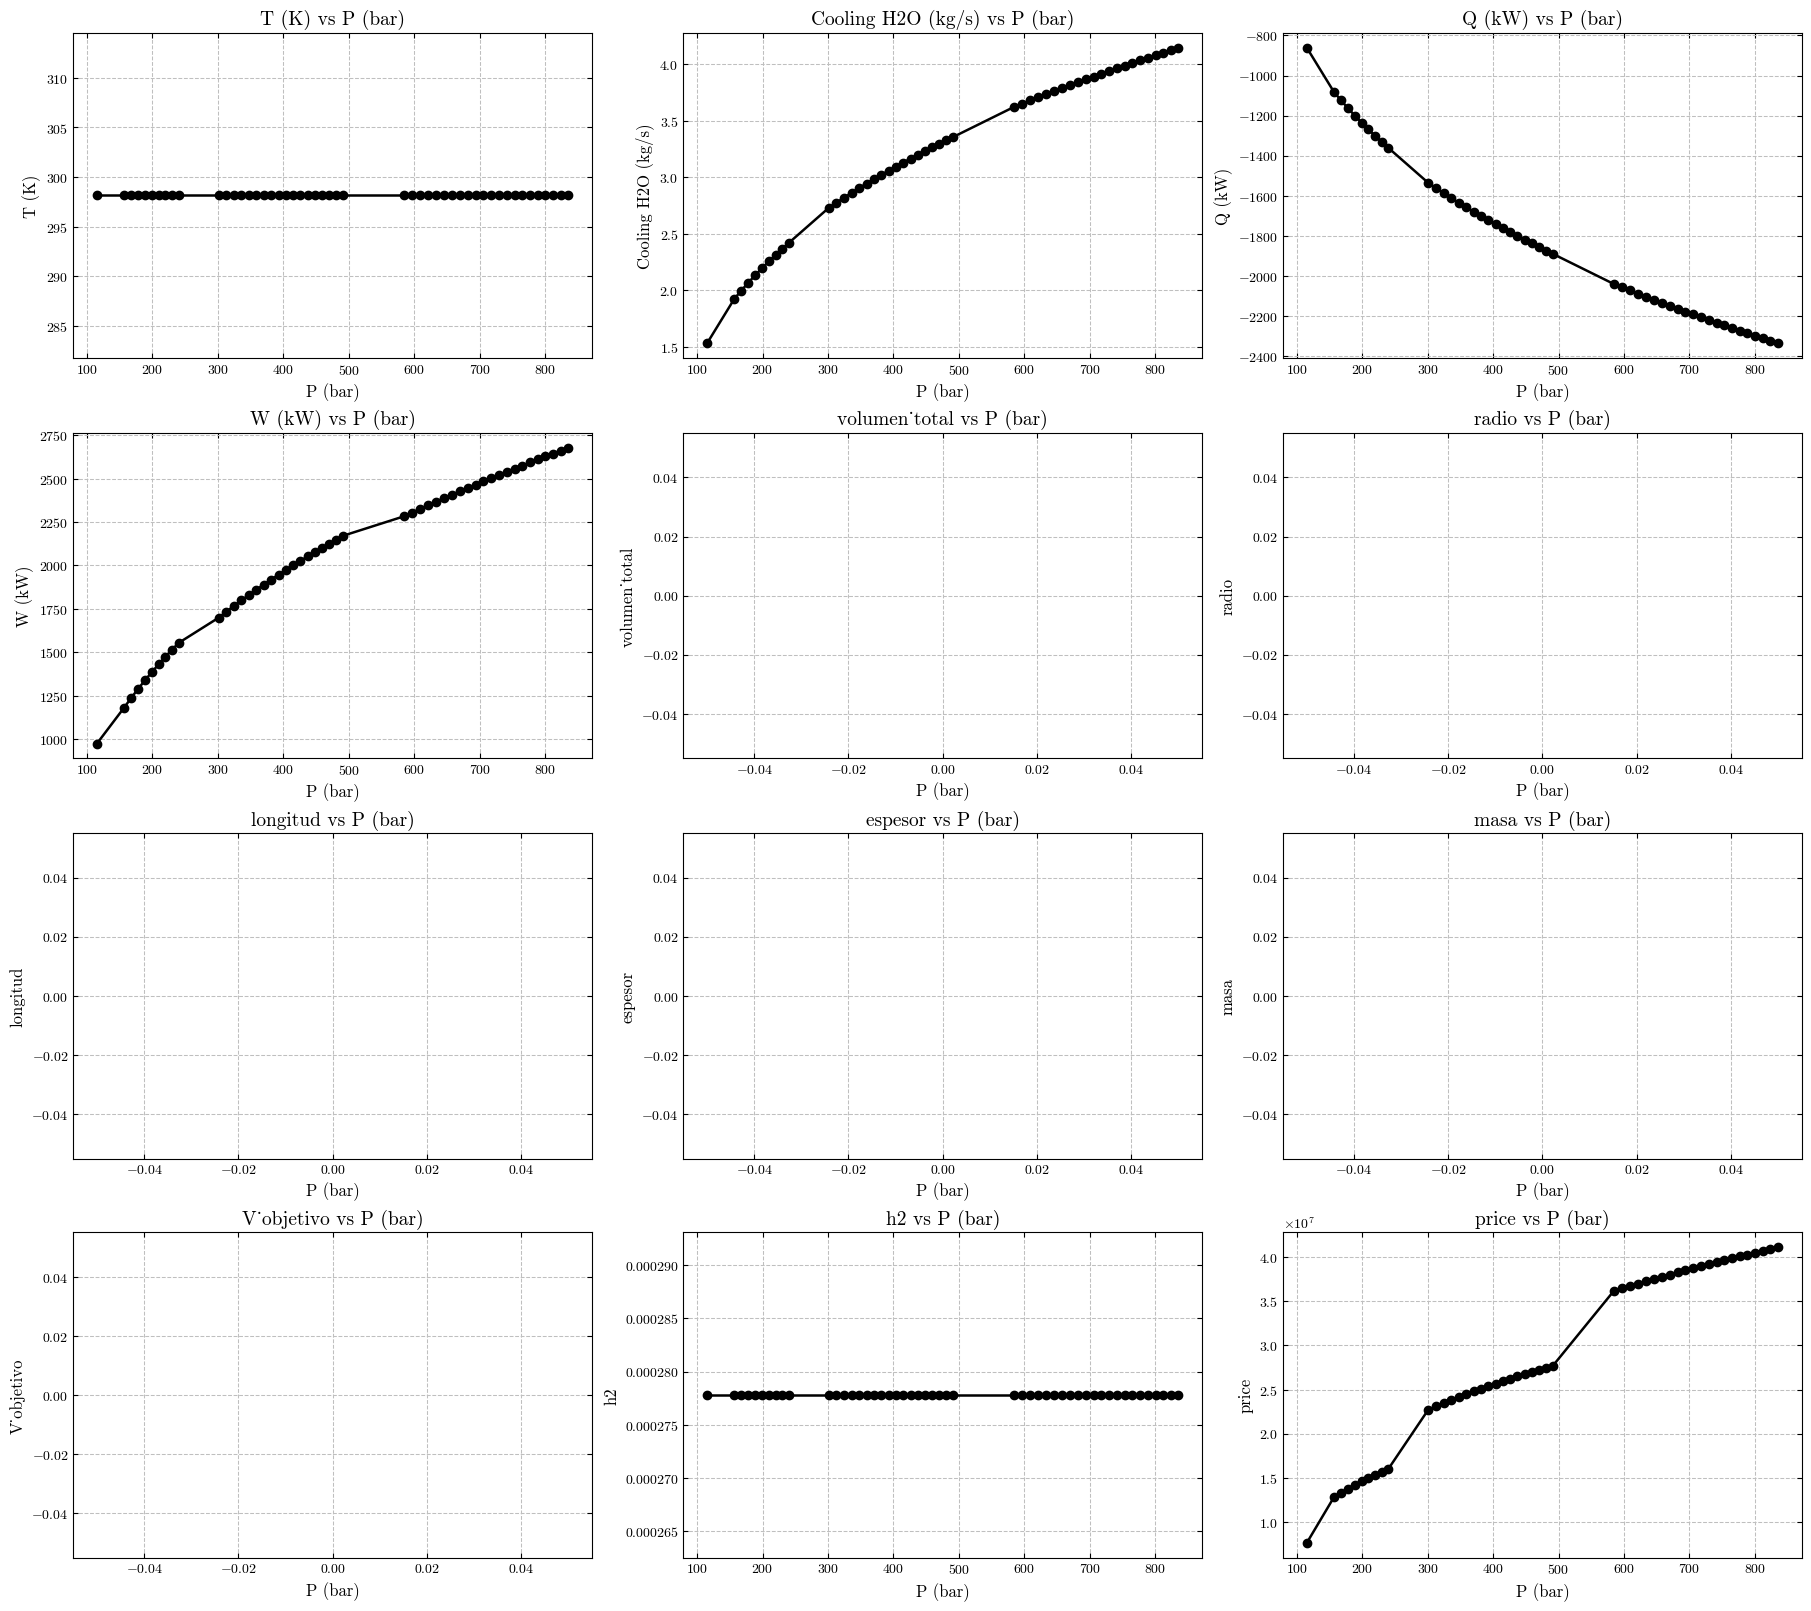

In [1120]:
import matplotlib.pyplot as plt
import scienceplots  # Asegúrate de tener instalado: pip install SciencePlots
import math

# Desactivar el uso de LaTeX para evitar el error.
#plt.rcParams['text.usetex'] = False

# Utiliza una combinación de estilos populares para obtener un formato científico
#plt.style.use(['science'])#, 'ieee', 'std-colors'])

# Lista de variables a graficar versus "P (bar)"
variables_to_plot = [
    "T (K)",
    "Cooling H2O (kg/s)",
    "Q (kW)",
    "W (kW)",
    "volumen_total",
    "radio",
    "longitud",
    "espesor",
    "masa",
    "V_objetivo",
    "h2",
    "price"
]

# Se asume que df_resultados ya está definido y contiene la columna "P (bar)" y las demás variables
df_resultados_sorted = df_resultados.sort_values(by="P (bar)")
import pandas as pd

# Se asume que df_resultados_sorted ya está definido y contiene la columna 'price'

# Calcular el primer (Q1) y tercer cuartil (Q3)
q1 = df_resultados_sorted['price'].quantile(0.25)
q3 = df_resultados_sorted['price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = q3 - q1

# Definir los límites inferior y superior para detectar outliers
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Filtrar el DataFrame eliminando los valores atípicos en la columna 'price'
df_resultados_filtrado = df_resultados_sorted[
    (df_resultados_sorted['price'] >= lower_bound) &
    (df_resultados_sorted['price'] <= upper_bound)
]
df_resultados_sorted=df_resultados_sorted
# Opcional: Mostrar el DataFrame filtrado


num_vars = len(variables_to_plot)
cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), constrained_layout=True)
axes = axes.flatten()

# Graficar cada variable versus "P (bar)"
for i, var in enumerate(variables_to_plot):
    ax = axes[i]
    ax.plot(
        df_resultados_sorted["P (bar)"],
        df_resultados_sorted[var],
        marker="o", linestyle="-", color="black"
    )
    ax.set_xlabel("P (bar)")
    ax.set_ylabel(var)
    ax.set_title(f"{var} vs P (bar)")
    ax.grid(True)
    ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)

# Eliminar axes vacíos en caso de que excedan el total de variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [1121]:
mini=df_resultados_sorted[df_resultados_sorted['price']==df_resultados_sorted['price'].min()]
mini

,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),volumen_total,radio,longitud,espesor,masa,V_objetivo,h2,price,It. No.
0,298.15,115.197603,1.52971,-860.595124,973.10875,None,None,None,None,None,None,0.000278,7.622638e+06,0


In [1122]:
compis[mini.index[0]]

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),T comp,Purchased Equipment Cost (USD)
0,No. 1,298.15,60.197603,0.767344,-431.697979,488.424722,115.828892,"$967,889.61"
1,No. 2,298.15,115.197603,0.762366,-428.897146,484.684028,115.137792,"$961,892.25"
2,Total,298.15,115.197603,1.529710,-860.595124,973.108750,230.966684,"$1,929,781.86"


In [1123]:
k=compis[df_resultados['It. No.'][mini.index[0]]]
k['Cooling H2O (ton/d)']=(k['Cooling H2O (kg/s)']*86400)/1e3*(4/24) #ton
k

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),T comp,Purchased Equipment Cost (USD),Cooling H2O (ton/d)
0,No. 1,298.15,60.197603,0.767344,-431.697979,488.424722,115.828892,"$967,889.61",11.049757
1,No. 2,298.15,115.197603,0.762366,-428.897146,484.684028,115.137792,"$961,892.25",10.978066
2,Total,298.15,115.197603,1.529710,-860.595124,973.108750,230.966684,"$1,929,781.86",22.027823


In [1124]:
k['P (bar)'][k.shape[0]-1]

np.float64(115.19760264131287)

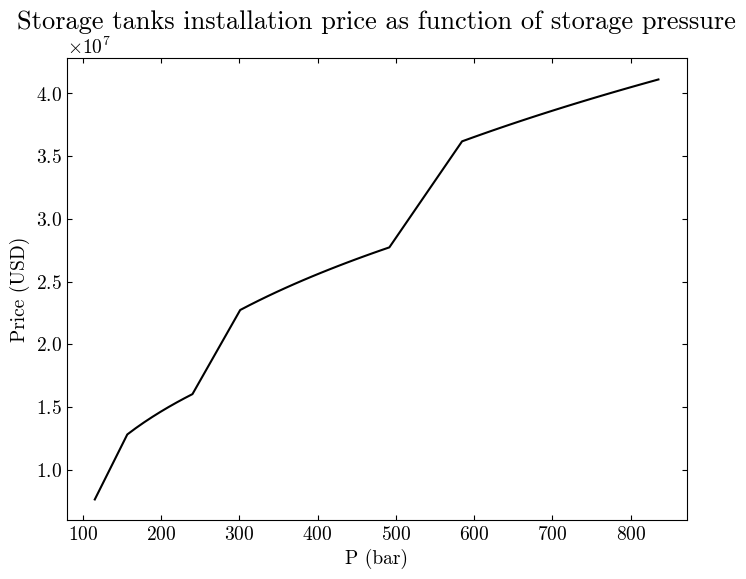

In [1125]:
import matplotlib.pyplot as plt
#import scienceplots  # Asegúrate de tener instalado: pip install SciencePlots

# Opcional: activar un estilo popular (en este ejemplo usamos 'no-latex')
plt.style.use(['no-latex'])

# Se asume que df_resultados ya está definido y contiene las columnas "P (bar)" y "price"
#df_resultados_sorted = df_resultados.sort_values(by="P (bar)")

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar 'price' en función de 'P (bar)'
ax.plot(df_resultados_sorted["P (bar)"], df_resultados_sorted["price"],
        linestyle="-", color="black",lw=1.5)

# Personalizar etiquetas y título
ax.set_xlabel("P (bar)", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Storage tanks installation price as function of storage pressure", fontsize=19)

# Activar la grilla y ajustar los ticks para un formato profesional

ax.tick_params(axis="both", which="major", labelsize=14, direction="in", top=True, right=True)
ax.tick_params(axis="both", which="minor", labelsize=12, direction="in", top=True, right=True)

# Forzar notación científica (esto hará que se muestre la notación ×10^...)
ax.ticklabel_format(axis="both", style="sci")

# Aumentar el tamaño de la fuente de la notación científica (offset text)
ax.xaxis.get_offset_text().set_fontsize(14)
ax.yaxis.get_offset_text().set_fontsize(14)

plt.show()


In [1126]:
import matplotlib.pyplot as plt

# Imprime todos los estilos disponibles en Matplotlib
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'petroff10', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


Parámetros ajustados:
a = 42.97231382209025
n = 16498928.854098234


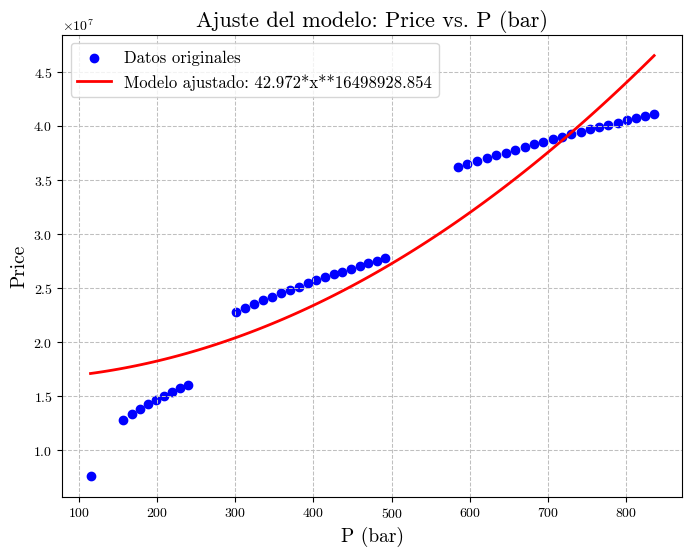

In [1127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Se asume que df_resultados ya está definido y contiene las columnas:
# 'P (bar)' -> variable independiente (x)
# 'price'   -> variable dependiente (y)
#
# Si deseas probar con datos simulados, puedes descomentar el siguiente bloque:
# df_resultados = pd.DataFrame({
#     "P (bar)": np.linspace(10, 100, 20),
#     "price": 2.5 * np.linspace(10, 100, 20)**1.2 + np.random.normal(0, 20, 20)
# })

# Extraer los datos
x = df_resultados['P (bar)'].values
y = df_resultados['price'].values

# Definir el modelo: f(x) = a * x^n
def model_func(x, a, n):
    return a * x**2+n

# Estimar valores iniciales para los parámetros (p0) es muy importante en la optimización no lineal
p0 = [1.0, 1.0]  # a = 1, n = 1, por ejemplo

# Ajuste del modelo usando curve_fit
# Usamos el método 'trf' para que se puedan pasar parámetros de tolerancia (xtol) y max_nfev
popt, pcov = curve_fit(
    model_func, 
    x, 
    y, 
    p0=p0, 
    method='trf', 
    xtol=1e-3,         # Tolerancia en los cambios en la solución 
    max_nfev=10000      # Número máximo de evaluaciones de la función
)

# Los parámetros optimizados se almacenan en popt
a_fit, n_fit = popt

print("Parámetros ajustados:")
print("a =", a_fit)
print("n =", n_fit)

# Crear puntos para graficar el modelo ajustado en el rango de los datos
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = model_func(x_fit, a_fit, n_fit)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos originales', color='blue')
plt.plot(x_fit, y_fit, label=f'Modelo ajustado: {a_fit:.3f}*x**{n_fit:.3f}', color='red', linewidth=2)
plt.xlabel("P (bar)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Ajuste del modelo: Price vs. P (bar)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Coeficientes ajustados:
a = -33.11678661950518
b = 77077.24584861042
c = 529049.3985582184


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 243 (\N{LATIN SMALL LETTER O WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


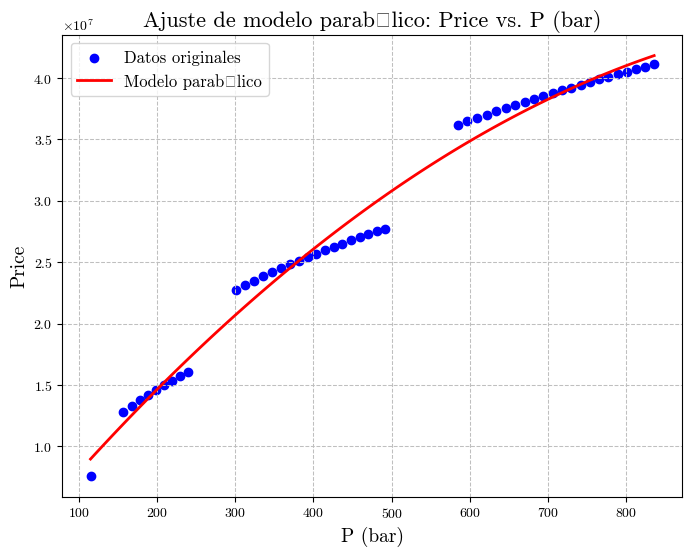

In [1128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_resultados ya está definido y contiene las columnas:
# 'P (bar)' para la presión y 'price' para el costo.
# Ejemplo de datos simulados (comenta o elimina estas líneas al trabajar con tus datos reales)
# df_resultados = pd.DataFrame({
#     "P (bar)": np.linspace(10, 100, 20),
#     "price": 0.05 * np.linspace(10, 100, 20)**2 - 2 * np.linspace(10, 100, 20) + 200 + np.random.normal(0, 20, 20)
# })

# Extraer datos de las columnas de interés
x = df_resultados['P (bar)'].values
y = df_resultados['price'].values

# Ajuste de un polinomio de grado 2 (parábola) a los datos
coeffs = np.polyfit(x, y, 2)  # coeffs = [a, b, c]
fitted_poly = np.poly1d(coeffs)

print("Coeficientes ajustados:")
print("a =", coeffs[0])
print("b =", coeffs[1])
print("c =", coeffs[2])

# Crear puntos para graficar la función ajustada
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = fitted_poly(x_fit)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos originales', color='blue')
plt.plot(x_fit, y_fit, label='Modelo parabólico', color='red', linewidth=2)
plt.xlabel("P (bar)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Ajuste de modelo parabólico: Price vs. P (bar)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [1129]:
stages,temperature,Qk,Wk,waterr,price=[],[],[],[],[],[]
for i in range(len(Pes)):
    P=Pes[i]
    Po=31
    P_diff=P-Po
    P1=Po
    P2=P
    N_etapas=np.ceil((np.log(P2)/np.log(P1))/np.log(2))
    stages.append(N_etapas)
    P_etapa=P_diff/N_etapas
    Po=Po
    Pf=P
    P_acum=[Po]
    Temps=[25+273.15]
    Tref=Tref
    m=m
    eta=0.75
    Qs,Ts,m_H2O,comp,power,Ps=[],[],[],[],[],[]
    for i in range(int(N_etapas)):
        P1=sum(P_acum)
        print(P1)
        P_acum.append(P_etapa)
        P2=sum(P_acum)
        #Ti=(sum(P_acum)*V2*2)/(m*Z*8.314)
        #print('T',Ti)
        # Valor inicial para la incógnita x (en este caso, es un vector de una dimensión)
        x0 = [1.0]
        sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
        if sol.success:
            print(sol.message)
        else:
            print(sol.message)

        resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
        print(f"W: {resultado:.20f} kW")
        # Se utiliza scipy.optimize.root con método 'hybr'
        solucion = root(balance, x0, args=(sol.x[0],Tref, m), method='hybr')

        if solucion.success:
            x_encontrado = solucion.x[0]
            print(f"Solución encontrada: x = {x_encontrado:.6f}")
            Temps.append(25+273.15)
            Qs.append(float(-e))
            Ts.append((25+273.15))
            m_H2O.append(float(x_encontrado))
            comp.append('No. '+str(i+1))
            CP=19.67099783 + 0.069681519*T - 0.000200098*T**2 + 2.89493E-07*T**3 - 2.22475E-10*T**4 + 8.81466E-14*T**5 - 1.42043E-17*T**6
            CP=CP/2*1000
            power.append(resultado*1e3)
            Ps.append(P2)
        else:
            print("No se encontró solución:", solucion.message)
    # Crear un DataFrame con los datos
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps,  # Convertir de Pa a bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        #"Q (kW) Aspen":np.array([-1645.66707374,-775.158866276,-514.144266522]),
        "W (kW)": np.array(power)
        #"W (kW) Aspen":np.array([2211.5522, 1052.84936, 706.504967])
        
    }

    df_compresores = pd.DataFrame(data)

    #df_compresores['Error %']=abs(((df_compresores['Q (kW) Aspen']-df_compresores['Q (kW) Python'])/df_compresores['Q (kW) Aspen']*100 + (df_compresores['W (kW) Aspen']-df_compresores['W (kW) Python'])/df_compresores['W (kW) Aspen']*100)/2)
    df_compresores.loc[df_compresores.shape[0]] = ["Total", Temps[-1], Ps[-1], sum(df_compresores['Cooling H2O (kg/s)']), sum(df_compresores['Q (kW)']), sum(df_compresores['W (kW)'])]
    calculator = PriceCalculator(df_compresores,N_etapas,CS)
    
    
    temperature.append(df_compresores.loc[df_compresores.shape[0]-1]['T (K)'])
    Qk.append(df_compresores.loc[df_compresores.shape[0]-1]['Q (kW)'])
    Wk.append(df_compresores.loc[df_compresores.shape[0]-1]['W (kW)'])
    waterr.append(df_compresores.loc[df_compresores.shape[0]-1]['Cooling H2O (kg/s)'])
    resultadot = calcular_dimension_tanque(P=df_compresores.loc[df_compresores.shape[0]-1]['P (bar)'], m=10000, crit=crit, tipo='hemi', rho_tank=4500)
    
    calculator1 = TankCostCalculator("Type I", resultadot['masa']*1e3)
    price.append(calculator.final+calculator1.final)
    

31
kW 1867.2835333955588
kW 1867.2835333955588
kW 1867.2835333955588
kW 1867.2835483360004
kW 1692.125003213775
kW 1690.4741173340667
kW 1690.4582729397364
kW 1690.4582714369349
The solution converged.
W: 0.62609565608775374912 kW
Solución encontrada: x = 0.950502
70.5
kW 1024.654754246111
kW 1024.654754246111
kW 1024.654754246111
kW 1024.654762370594
kW 862.9168037527157
kW 860.9828037583148
kW 860.9569083348937
kW 860.9569032420858
kW 860.9569032420729
The solution converged.
W: 0.31887292712669362826 kW
Solución encontrada: x = 0.541610
Volumen calculado del tanque: 1173.28 m³
Radio del tanque: 4.82 m
Longitud del tanque: 19.28 m
Espesor del tanque: 385.51 mm
Masa del tanque: 4769.93 ton
31
kW 1574.1256794339677
kW 1574.1256794339677
kW 1574.1256794339677
kW 1574.1256920455478
kW 1389.2961583083168
kW 1387.3212051758812
kW 1387.299170838977
kW 1387.2991679512647
The solution converged.
W: 0.51381450664861660904 kW
Solución encontrada: x = 0.801133
62.027210884353735
kW 930.190343655

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

31
kW 2664.7883548407453
kW 2664.7883548407453
kW 2664.7883548407453
kW 2664.788376057848
kW 2596.2021089721607
kW 2595.973032048265
kW 2595.9722718450334
kW 2595.9722718366907
The solution converged.
W: 0.96147121179136696423 kW
Solución encontrada: x = 1.395880
99.578231292517
kW 1225.365206300626
kW 1225.365206300626
kW 1225.365206300626
kW 1225.365215888445
kW 1052.841095313622
kW 1050.8477895434025
kW 1050.8227653943518
kW 1050.8227611272748
kW 1050.8227611272648
The solution converged.
W: 0.38919361523232026689 kW
Solución encontrada: x = 0.635250
168.156462585034
kW 820.8247169704429
kW 820.8247169704429
kW 820.8247169704429
kW 820.8247232667952
kW 684.0070584415103
kW 682.3848539410288
kW 682.362666188712
kW 682.3626615712275
kW 682.3626615712146
The solution converged.
W: 0.25272691169304251080 kW
Solución encontrada: x = 0.453510
Volumen calculado del tanque: 578.35 m³
Radio del tanque: 3.81 m
Longitud del tanque: 15.23 m
Espesor del tanque: 655.4 mm
Masa del tanque: 3364.29 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1394.732784657882
kW 1394.732784657882
kW 1394.732784657882
kW 1394.7327953092815
kW 1221.0045546168856
kW 1219.1186549133085
kW 1219.0969690103468
kW 1219.0969659432649
The solution converged.
W: 0.45151739479380176290 kW
Solución encontrada: x = 0.718220
262.03401360544217
kW 916.8253519008626
kW 916.8253519008626
kW 916.8253519008626
kW 916.8253586473393
kW 777.0034251534719
kW 775.4242393009363
kW 775.4040989745525
kW 775.40409533277
kW 775.4040953327615
The solution converged.
W: 0.28718670197509682529 kW
Solución encontrada: x = 0.499409
Volumen calculado del tanque: 388.96 m³
Radio del tanque: 3.34 m
Longitud del tanque: 13.35 m
Espesor del tanque: 915.78 mm
Masa del tanque: 3110.65 ton
31
kW 3650.072289834375
kW 3650.072289834375
kW 3650.072289834375
kW 3650.072318611805
kW 3893.554235308381
kW 3890.6897648531785
kW 3890.7250254747482
kW 3890.725031026109
The solution converged.
W: 1.44100927075041074232 kW
Solución encontrada: x = 2.028910
151.2108843537415
kW 1407.18033272

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 297.84 m³
Radio del tanque: 3.05 m
Longitud del tanque: 12.21 m
Espesor del tanque: 1181.54 mm
Masa del tanque: 3184.82 ton
31
kW 4364.909812182861
kW 4364.909812182861
kW 4364.909812182861
kW 4364.909846219997
kW 4974.706856303489
kW 4955.848320491833
kW 4956.505368850942
kW 4956.506249835656
kW 4956.506249793307
The solution converged.
W: 1.83574305547900284985 kW
Solución encontrada: x = 2.543441
202.843537414966
kW 1519.4563330978704
kW 1519.4563330978704
kW 1519.4563330978704
kW 1519.4563443361546
kW 1350.7039727639706
kW 1349.012503094802
kW 1348.994902580782
kW 1348.9949005575147
The solution converged.
W: 0.49962774094722756102 kW
Solución encontrada: x = 0.782254
374.687074829932
kW 1000.9398198098959
kW 1000.9398198098959
kW 1000.9398198098959
kW 1000.9398267945542
kW 862.7159893193283
kW 861.2589535279091
kW 861.2419521428354
kW 861.2419495655354
The solution converged.
W: 0.31897849983908721505 kW
Solución encontrada: x = 0.541750
Volumen calcu

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1062.8662696206743
kW 1062.8662696206743
kW 1062.8662696206743
kW 1062.8662767124745
kW 927.4739797226385
kW 926.1289380763662
kW 926.1143604614574
kW 926.11435855227
The solution converged.
W: 0.34300531798232225533 kW
Solución encontrada: x = 0.573747
Volumen calculado del tanque: 248.46 m³
Radio del tanque: 2.87 m
Longitud del tanque: 11.49 m
Espesor del tanque: 1435.84 mm
Masa del tanque: 3407.86 ton
31
kW 4935.6033550286065
kW 4935.6033550286065
kW 4935.6033550286065
kW 4935.603393062038
kW 5929.023620136615
kW 5875.581473628783
kW 5879.015173597069
kW 5879.031703877144
kW 5879.031698505662
The solution converged.
W: 2.17741914759468979668 kW
Solución encontrada: x = 2.980551
254.47619047619048
kW 1607.066305756278
kW 1607.066305756278
kW 1607.066305756278
kW 1607.0663172816733
kW 1444.766245610174
kW 1443.2584097916292
kW 1443.2440795171144
kW 1443.2440781493565
The solution converged.
W: 0.53453484375902082792 kW
Solución encontrada: x = 0.828705
477.95238095238096
kW 1068.85

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

In [1130]:
resultados=pd.DataFrame()
resultados['P (bar)']=Pes
resultados['Stages']=stages
resultados['Q (kW)']=Qk
resultados['W (kW)']=Wk
resultados['H2O (kg/s)']=waterr
resultados['Price (USD)']=price

/tmp/ipykernel_48527/4128071261.py:84: UserWarning: Glyph 243 (\N{LATIN SMALL LETTER O WITH ACUTE}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 243 (\N{LATIN SMALL LETTER O WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


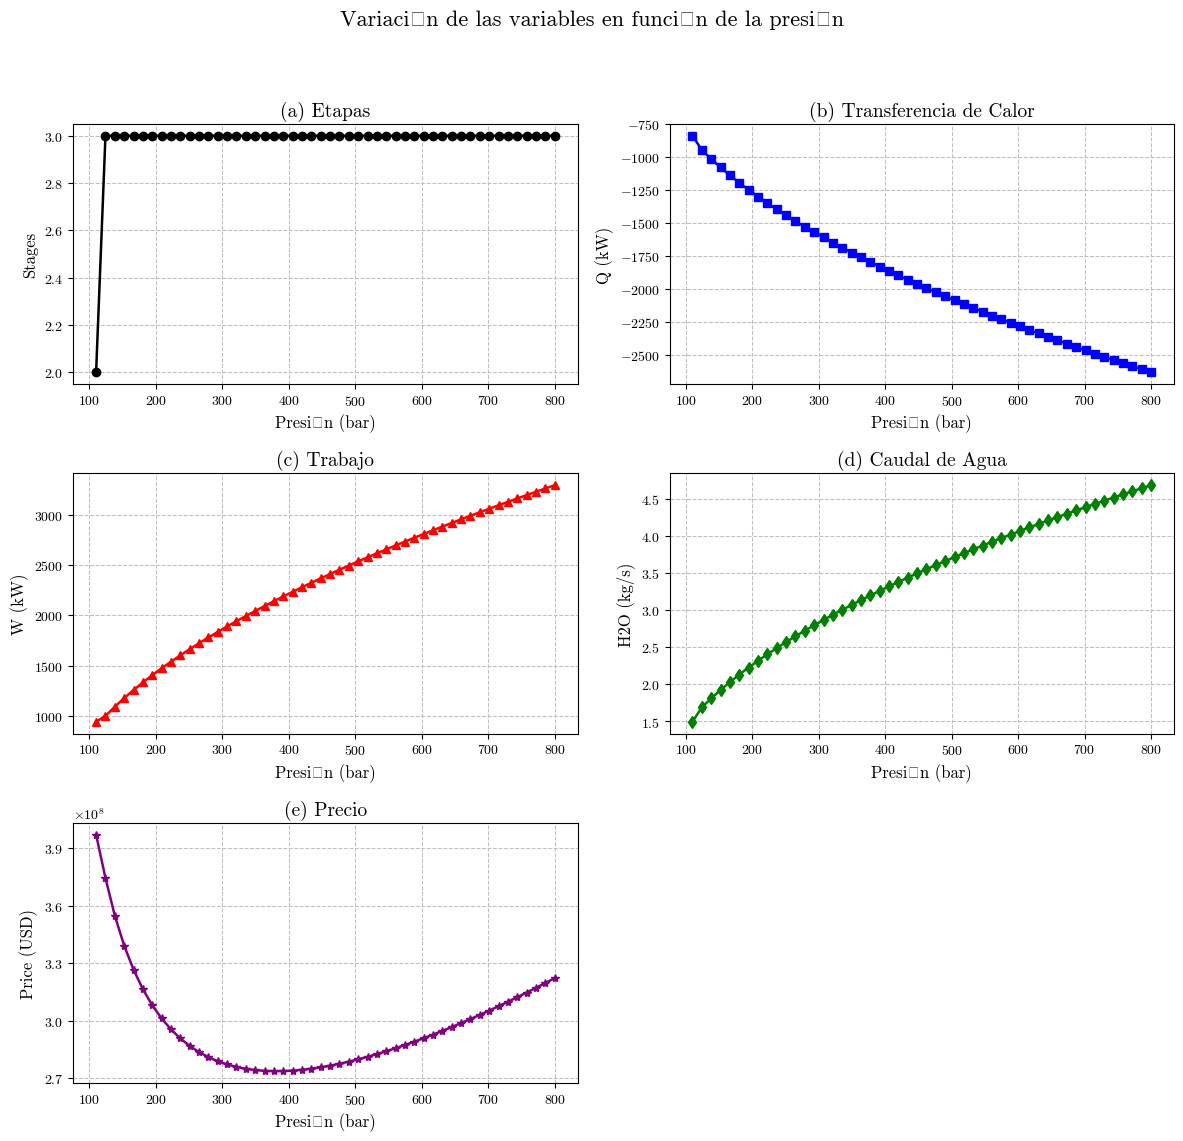

In [1131]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker  # Para controlar la cantidad de ticks en el eje y

# Aplicamos el estilo clásico y actualizamos algunos parámetros estéticos
#plt.style.use('classic')
plt.rcParams.update({
    'font.size': 12,             # Tamaño global de fuente
    'axes.labelsize': 12,        # Tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,        # Tamaño de los títulos de los ejes
    'xtick.labelsize': 10,       # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,       # Tamaño de las etiquetas del eje y
    'lines.linewidth': 1.8,      # Grosor de las líneas
    'lines.markersize': 6,       # Tamaño de los marcadores
    'grid.linestyle': '--',      # Estilo discontínuo para la rejilla
    'grid.linewidth': 0.75,      # Grosor de la rejilla
    'grid.color': '0.75',        # Color gris para la rejilla
})

# Se asume que las variables Pes, stages, Qk, Wk, waterr y price ya están definidas
resultados = pd.DataFrame({
    'P (bar)': Pes,
    'Stages': stages,
    'Q (kW)': Qk,
    'W (kW)': Wk,
    'H2O (kg/s)': waterr,
    'Price (USD)': price
})

# Configuración de la figura con 3 filas y 2 columnas (sin sharex para mostrar todos los valores en X)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Variación de las variables en función de la presión', fontsize=16, fontweight='bold')

# Panel (a): Stages vs. Presión
axs[0, 0].plot(resultados['P (bar)'], resultados['Stages'],
               marker='o', linestyle='-', color='black')
axs[0, 0].set_ylabel('Stages')
axs[0, 0].set_title('(a) Etapas')
axs[0, 0].grid(True)
axs[0, 0].set_axisbelow(True)
axs[0, 0].set_xlabel('Presión (bar)')  # Se muestran los valores del eje de la presión

# Panel (b): Q (kW) vs. Presión
axs[0, 1].plot(resultados['P (bar)'], resultados['Q (kW)'],
               marker='s', linestyle='-', color='blue')
axs[0, 1].set_ylabel('Q (kW)')
axs[0, 1].set_title('(b) Transferencia de Calor')
axs[0, 1].grid(True)
axs[0, 1].set_axisbelow(True)
axs[0, 1].set_xlabel('Presión (bar)')

# Panel (c): W (kW) vs. Presión
axs[1, 0].plot(resultados['P (bar)'], resultados['W (kW)'],
               marker='^', linestyle='-', color='red')
axs[1, 0].set_ylabel('W (kW)')
axs[1, 0].set_title('(c) Trabajo')
axs[1, 0].grid(True)
axs[1, 0].set_axisbelow(True)
axs[1, 0].set_xlabel('Presión (bar)')

# Panel (d): H2O (kg/s) vs. Presión
axs[1, 1].plot(resultados['P (bar)'], resultados['H2O (kg/s)'],
               marker='d', linestyle='-', color='green')
axs[1, 1].set_ylabel('H2O (kg/s)')
axs[1, 1].set_title('(d) Caudal de Agua')
axs[1, 1].grid(True)
axs[1, 1].set_axisbelow(True)
axs[1, 1].set_xlabel('Presión (bar)')

# Panel (e): Price (USD) vs. Presión
axs[2, 0].plot(resultados['P (bar)'], resultados['Price (USD)'],
               marker='*', linestyle='-', color='purple')
axs[2, 0].set_ylabel('Price (USD)')
axs[2, 0].set_title('(e) Precio')
axs[2, 0].grid(True)
axs[2, 0].set_axisbelow(True)
axs[2, 0].set_xlabel('Presión (bar)')
# Reducir el número de ticks en el eje y a un máximo de 5 para el gráfico de Price
axs[2, 0].yaxis.set_major_locator(ticker.MaxNLocator(5))

# Ocultamos el panel vacío (última celda de la cuadrícula)
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [1132]:


P=172
Po=31
P_diff=P-Po
P1=Po
P2=P
N_etapas=np.ceil((np.log(P2)/np.log(P1))/np.log(2))
N_etapas
P_etapa=P_diff/N_etapas
Po=Po
Pf=P
P_acum=[Po]
Temps=[25+273.15]
Tref=Tref
m=m
eta=0.75
Qs,Ts,m_H2O,comp,power,Ps=[],[],[],[],[],[]
for i in range(int(N_etapas)):
    P1=sum(P_acum)
    print(P1)
    P_acum.append(P_etapa)
    P2=sum(P_acum)
    #Ti=(sum(P_acum)*V2*2)/(m*Z*8.314)
    #print('T',Ti)
    # Valor inicial para la incógnita x (en este caso, es un vector de una dimensión)
    x0 = [1.0]
    sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
    if sol.success:
        print(sol.message)
    else:
        print(sol.message)

    resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
    print(f"W: {resultado:.20f} kW")
    # Se utiliza scipy.optimize.root con método 'hybr'
    solucion = root(balance, x0, args=(sol.x[0],Tref, m), method='hybr')

    if solucion.success:
        x_encontrado = solucion.x[0]
        print(f"Solución encontrada: x = {x_encontrado:.6f}")
        Temps.append(25+273.15)
        Qs.append(float(-e))
        Ts.append((25+273.15))
        m_H2O.append(float(x_encontrado))
        comp.append('No. '+str(i+1))
        CP=19.67099783 + 0.069681519*T - 0.000200098*T**2 + 2.89493E-07*T**3 - 2.22475E-10*T**4 + 8.81466E-14*T**5 - 1.42043E-17*T**6
        CP=CP/2*1000
        power.append(resultado*1e3)
        Ps.append(P2)
    else:
        print("No se encontró solución:", solucion.message)
# Crear un DataFrame con los datos
data = {
	"Compressor": comp,
    "T (K)": Ts,
    "P (bar)": Ps,  # Convertir de Pa a bar
	"Cooling H2O (kg/s)": m_H2O,
	"Q (kW)": np.array(Qs),
    #"Q (kW) Aspen":np.array([-1645.66707374,-775.158866276,-514.144266522]),
    "W (kW)": np.array(power)
    #"W (kW) Aspen":np.array([2211.5522, 1052.84936, 706.504967])
    
}

df_compresores = pd.DataFrame(data)

#df_compresores['Error %']=abs(((df_compresores['Q (kW) Aspen']-df_compresores['Q (kW) Python'])/df_compresores['Q (kW) Aspen']*100 + (df_compresores['W (kW) Aspen']-df_compresores['W (kW) Python'])/df_compresores['W (kW) Aspen']*100)/2)
df_compresores.loc[df_compresores.shape[0]] = ["Total", Temps[-1], Ps[-1], sum(df_compresores['Cooling H2O (kg/s)']), sum(df_compresores['Q (kW)']), sum(df_compresores['W (kW)'])]
df_compresores


31
kW 2099.6081213396997
kW 2099.6081213396997
kW 2099.6081213396997
kW 2099.6081381186063
kW 1943.0449633545518
kW 1941.7791147680246
kW 1941.7688353379679
kW 1941.768834650278
The solution converged.
W: 0.71917364246306603182 kW
Solución encontrada: x = 1.074242
78.0
kW 1090.4662603714667
kW 1090.4662603714667
kW 1090.4662603714667
kW 1090.4662689896174
kW 924.2422462538713
kW 922.2707260516489
kW 922.2448043895358
kW 922.2447994955525
kW 922.24479949554
The solution converged.
W: 0.34157214796131113443 kW
Solución encontrada: x = 0.571839
125.0
kW 750.7507762999617
kW 750.7507762999617
kW 750.7507762999617
kW 750.7507821595873
kW 619.4312736720176
kW 617.8505447917091
kW 617.8282810823689
kW 617.828276158673
kW 617.8282761586584
The solution converged.
W: 0.22882528746616970228 kW
Solución encontrada: x = 0.421671


,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW)
0,No. 1,298.15,78.0,1.074242,-604.355007,719.173642
1,No. 2,298.15,125.0,0.571839,-321.709204,341.572148
2,No. 3,298.15,172.0,0.421671,-237.226878,228.825287
3,Total,298.15,172.0,2.067753,-1163.291089,1289.571078


In [1133]:

calculator = PriceCalculator(df_compresores,N_etapas,CS)

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


In [1134]:
calculator.dataframe

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),Purchased Equipment Cost (USD)
0,No. 1,298.15,78.0,1.074242,-604.355007,719.173642,"$1,752,500.82"
1,No. 2,298.15,125.0,0.571839,-321.709204,341.572148,"$961,111.32"
2,No. 3,298.15,172.0,0.421671,-237.226878,228.825287,"$681,583.84"
3,Total,298.15,172.0,2.067753,-1163.291089,1289.571078,"$3,395,195.98"


In [1135]:
Tref

283.15

In [1136]:
import numpy as np
import pandas as pd
from scipy.optimize import root, minimize

def normalize_price(price):
    """
    Convierte un valor de precio que puede venir formateado (por ejemplo, "$1,234.56")
    a un número tipo float.
    Si 'price' es un pandas.Series con un solo valor, se extrae ese valor.
    """
    # Si es una serie (con un solo valor), extraer el valor.
    if isinstance(price, pd.Series):
        price = price.iloc[0]
    
    # Si ya es numérico, lo retorna en forma float.
    if isinstance(price, (int, float)):
        return float(price)
    
    if isinstance(price, str):
        # Eliminar símbolos comunes: $, €, espacios y comas
        cleaned = price.replace("$", "").replace("€", "").replace(",", "").strip()
        try:
            return float(cleaned)
        except Exception as ex:
            raise ValueError("No se pudo normalizar el precio: '{}'".format(price))
    # De lo contrario, se intenta convertir a float
    return float(price)

def cost_function(P, m, Tref, T, CS, crit):
    """
    Función objetivo para minimizar; dada una presión P (en bar) calcula el costo total,
    el cual es la suma de:
      - El costo de compresión obtenido con PriceCalculator.
      - El costo del tanque obtenido con TankCostCalculator.
    
    Se normalizan los precios para asegurar que sean float antes de realizar la suma.

    Parámetros:
      - P   : Presión final (en bar). Es la variable independiente a optimizar.
      - m   : Parámetro relacionado a la masa o cantidad a comprimir.
      - Tref: Temperatura de referencia (en Kelvin).
      - T   : Temperatura usada en algunos cálculos (ej. en la ecuación de Cp).
      - CS  : Constante o parámetro requerido por PriceCalculator.
      - crit: Diccionario con las propiedades críticas (keys: 'Tc', 'Pc', 'PM', 'w').
    
    Devuelve:
      total_cost: Suma de los costos (float) de compresión y de tanque.
    """

    # Fijamos la presión de entrada (Po) a 31 bar.
    Po = 31  
    P=P[0]
    if P <= Po:
        # Penalizar fuertemente si la presión final no supera la de entrada.
        return 1e12

    P_diff = P - Po
    P1 = Po
    P2 = P
    # Estimación del número de etapas. Se redondea hacia arriba.
    N_etapas = np.ceil((np.log(P2) / np.log(P1)) / np.log(2))
    # Incremento de presión por etapa:
    P_etapa = P_diff / N_etapas

    # Variables iniciales para las etapas
    P_acum = [Po]            # Acumulador de presión
    Temps = [25 + 273.15]    # Temperatura en Kelvin (25°C + 273.15)
    eta = 0.75               # Eficiencia
    # Inicializar listas para los resultados de cada etapa
    Qs, Ts, m_H2O, comp, power, Ps_list = [], [], [], [], [], []
    
    # Bucle sobre las etapas de compresión:
    for j in range(int(N_etapas)):
        # La presión de entrada actual es la suma de los incrementos acumulados.
        P1_current = sum(P_acum)
        # Agregar la presión de la etapa y actualizar la presión de salida.
        P_acum.append(P_etapa)
        P2_current = sum(P_acum)
        
        # Resolver la ecuación de trabajo reversible (usando una función externa)
        sol = root(trabajo_reversible_IT, x0=500, args=(m, P1_current, P2_current, eta, 298.15), method='hybr')
        if not sol.success:
            return 1e12  # Penalización si no se converge

        # Calcular el trabajo (en kW) usando la función trabajo_reversible.
        # Se utiliza sol.x[0] - 273.15 para convertir de Kelvin a °C.
        resultado = trabajo_reversible(m, P1_current, P2_current, eta, sol.x[0] - 273.15, 298.15)
        
        # Resolver la ecuación de balance (por ejemplo, para obtener el caudal de enfriamiento),
        # usando root con un valor inicial.
        x0_vec = [1.0]
        solucion = root(balance, x0_vec, args=(sol.x[0], Tref, m), method='hybr')
        if not solucion.success:
            return 1e12
        x_encontrado = solucion.x[0]
        
        # Se asume un valor placeholder para "e" (ya que no está definido, se utiliza 0)
        e_value = 0  
        
        # Acumulación de datos para la etapa.
        Temps.append(25 + 273.15)
        Qs.append(float(-e_value))  # Aquí se debe introducir el valor correcto para Q.
        Ts.append(25 + 273.15)
        m_H2O.append(float(x_encontrado))
        comp.append('No. ' + str(j + 1))
        # Se calcula CP con una expresión polinómica (ejemplo, sin utilizarlo directamente)
        CP = (19.67099783 
              + 0.069681519 * T 
              - 0.000200098 * T**2 
              + 2.89493E-07 * T**3 
              - 2.22475E-10 * T**4 
              + 8.81466E-14 * T**5 
              - 1.42043E-17 * T**6)
        CP = CP / 2 * 1000
        
        power.append(resultado * 1e3)  # Convertir a Watts, por ejemplo.
        Ps_list.append(P2_current)
    
    # Armado del DataFrame con información de cada etapa.
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps_list,  # Se trabaja con P en bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        "W (kW)": np.array(power)
    }
    df_compresores = pd.DataFrame(data)
    # Agregar una fila "Total" que resume los valores.
    total_row = ["Total",
                 Temps[-1],
                 Ps_list[-1],
                 df_compresores["Cooling H2O (kg/s)"].sum(),
                 df_compresores["Q (kW)"].sum(),
                 df_compresores["W (kW)"].sum()]
    df_compresores.loc[df_compresores.shape[0]] = total_row

    # --- Cálculo de costos ---
    # Se obtiene el costo del proceso de compresión.
    calculator = PriceCalculator(df_compresores, N_etapas, CS)
    cost_compression = normalize_price(calculator.final)

    # Se dimensiona el tanque utilizando la función calcular_dimension_tanque.
    resultadot = calcular_dimension_tanque(
        P=sum(Ps_list),
        m=10000,
        crit=crit,
        tipo='hemi',
        rho_tank=4500
    )
    # Se calcula el costo del tanque.
    calculator1 = TankCostCalculator("Type I", resultadot["masa"] * 1e3)
    cost_tank = normalize_price(calculator1.extras_df["Final Cost (USD)"])

    # Sumar ambos costos para obtener el costo total.
    total_cost = cost_compression + cost_tank
    print
    print('TOTAL:',total_cost)
    return total_cost

# --- Ejemplo de optimización usando scipy.minimize ---
if __name__ == '__main__':
    # Parámetros o variables del proceso (se deben definir según tu aplicación)
    m = 4/86400           # Ejemplo: masa o caudal relacionado
    Tref = Tref      # Temperatura de referencia en Kelvin
    T = 298.15         # Temperatura usada para ciertos cálculos (como CP)
    CS = "Carbon Steel"           # Constante para PriceCalculator (ejemplo)
    crit = crit
    
    # Definir límites para la presión óptima (en bar). Po es 31 en el código, así que se debe estar por encima.
    P_min = 50  
    P_max = 1000
    x0 = [900]  # Valor inicial en bar
    
    # Ejecutar la optimización
    res = minimize(cost_function, x0, args=(m, Tref, T, CS, crit),
                   bounds=[(P_min, P_max)])
    
    if res.success:
        print("Presión óptima encontrada (bar):", res.x[0])
        print("Costo total mínimo:", res.fun)
    else:
        print("La optimización falló:", res.message)


kW 5541.063399431749
kW 5541.063399431749
kW 5541.063399431749
kW 5541.0634414469505
kW 7032.575719247068
kW 6900.452524637113
kW 6914.935346060866
kW 6915.153880983119
kW 6915.153488377773
kW 6915.153488388297
kW 1703.815957234465
kW 1703.815957234465
kW 1703.815957234465
kW 1703.8159689704516
kW 1550.800507761304
kW 1549.5135785306297
kW 1549.5026795756426


/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1549.5026787538607
kW 1151.1566151930156
kW 1151.1566151930156
kW 1151.1566151930156
kW 1151.1566223789655
kW 1021.0558684450076
kW 1019.8721568857829
kW 1019.8606396126753
kW 1019.8606383957296
Volumen calculado del tanque: 144.57 m³
Radio del tanque: 2.4 m
Longitud del tanque: 9.6 m
Espesor del tanque: 3193.18 mm
Masa del tanque: 6887.82 ton
TOTAL: 569388498.4849861
kW 5541.063399459629
kW 5541.063399459629
kW 5541.063399459629
kW 5541.063441474828
kW 7032.575662968159
kW 6900.4525320083
kW 6914.935346325855
kW 6915.153881031335
kW 6915.153488426571
kW 6915.1534884370985
kW 1703.8159572390753
kW 1703.8159572390753
kW 1703.8159572390753
kW 1703.8159689750644
kW 1550.8005037544629
kW 1549.5135785020593
kW 1549.5026795807428
kW 1549.5026787589659
kW 1151.156615197086
kW 1151.156615197086
kW 1151.156615197086
kW 1151.1566223830353
kW 1021.0558693445005
kW 1019.8721568987353
kW 1019.8606396170188
kW 1019.8606384000722
Volumen calculado del tanque: 144.57 m³
Radio del tanque: 2.4 m
Long

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1858.5495347260678
kW 1858.5495347260678
kW 1858.5495347260678
kW 1858.5495495972614
kW 1682.8832635101514
kW 1681.2198165593077
kW 1681.2037666603098
kW 1681.203765120818
kW 1022.0362000845322
kW 1022.0362000845322
kW 1022.0362000845322
kW 1022.036208189177
kW 860.4943543941805
kW 858.5621686449588
kW 858.5362799170747
kW 858.5362748177699
kW 858.5362748177563
kW 715.4088883325677
kW 715.4088883325677
kW 715.4088883325677
kW 715.4088939490541
kW 587.6771542391589
kW 586.1345019895269
kW 586.112551384603
kW 586.1125464232445
kW 586.1125464232283
Volumen calculado del tanque: 436.32 m³
Radio del tanque: 3.47 m
Longitud del tanque: 13.87 m
Espesor del tanque: 827.64 mm
Masa del tanque: 3144.76 ton
TOTAL: 259406336.72538483
kW 1858.5495348349357
kW 1858.5495348349357
kW 1858.5495348349357
kW 1858.5495497061293
kW 1682.883263626907
kW 1681.2198166745914
kW 1681.2037667755776
kW 1681.2037652360873
kW 1022.0362001172412
kW 1022.0362001172412
kW 1022.0362001172412
kW 1022.0362082218862
kW 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.3083341
kW 1929.4873370384187
kW 1929.4873370384187
kW 1929.4873370384187
kW 1929.4873524717707
kW 1758.3423942532452
kW 1756.7854093499689
kW 1756.771046352458
kW 1756.771045099286
kW 1042.9879194267994
kW 1042.9879194267994
kW 1042.9879194267994
kW 1042.9879276897807
kW 879.9141256781625
kW 877.968086672671
kW 877.9421561147371
kW 877.9421510703934
kW 877.9421510703808
Volumen calculado del tanque: 717.24 m³
Radio del tanque: 4.09 m
Longitud del tanque: 16.37 m
Espesor del tanque: 554.16 mm
Masa del tanque: 3655.6 ton
TOTAL: 300242656.9379038
kW 1929.4873371969122
kW 1929.4873371969122
kW 1929.4873371969122
kW 1929.487352630265
kW 1758.34239315369
kW 1756.7854095082328
kW 1756.7710465223201
kW 1756.7710452691506
kW 1042.987919472819
kW 1042.987919472819
kW 1042.987919472819
kW 1042.9879277358
kW 879.9141261079269
kW 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 1414.28 m³
Radio del tanque: 5.13 m
Longitud del tanque: 20.52 m
Espesor del tanque: 337.55 mm
Masa del tanque: 5392.76 ton
TOTAL: 441143740.6285495
kW 604.5874501512657
kW 604.5874501512657
kW 604.5874501512657
kW 604.5874550103839
kW 489.2961238507366
kW 487.9098776020679
kW 487.8898018258634
kW 487.88979710094634
kW 487.88979710092974
kW 478.07211399387757
kW 478.07211399387757
kW 478.07211399387757
kW 478.0721178289854
kW 382.74269550130873
kW 381.6038327767078
kW 381.5870238862688
kW 381.5870197634907
kW 381.58701976347555
Volumen calculado del tanque: 1414.28 m³
Radio del tanque: 5.13 m
Longitud del tanque: 20.52 m
Espesor del tanque: 337.55 mm
Masa del tanque: 5392.76 ton
TOTAL: 441143740.5787864
kW 2021.535818713229
kW 2021.535818713229
kW 2021.535818713229
kW 2021.535834875102
kW 1857.6199280896185
kW 1856.2149431643143
kW 1856.2027991653865
kW 1856.202798240691
kW 1069.1418575989178
kW 1069.1418575989178
kW 1069.1418575989178
kW 1069.141866058221

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.57 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764882.31461823
kW 2155.496180218164
kW 2155.496180218164
kW 2155.496180218164
kW 2155.496197438252
kW 2004.8931303433317
kW 2003.7313830023124
kW 2003.7224046074832
kW 2003.7224040651004
kW 1105.2753269093685
kW 1105.2753269093685
kW 1105.2753269093685
kW 1105.2753356371165
kW 938.1628203086926
kW 936.1851096225677
kW 936.1592213538328
kW 936.159216514133
kW 936.1592165141218
kW 758.3759482954197
kW 758.3759482954197
kW 758.3759482954197
kW 758.3759542058247
kW 626.3464205826899
kW 624.7587793602469
kW 624.7364748762888
kW 624.7364699698609
kW 624.7364699698455
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.57 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764882.3147233
kW 2155.4971258444502
kW 2155.4971258444502
kW 2155.4971258444502
kW 2155.4971430645423
kW

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 2155.4971872087085
kW 2155.4971872087085
kW 2155.4971872087085
kW 2155.497204428803
kW 2004.8942518633257
kW 2003.7325045734872
kW 2003.723526187428
kW 2003.7235256450472
kW 1105.2755904300625
kW 1105.2755904300625
kW 1105.2755904300625
kW 1105.275599157812
kW 938.1630694406415
kW 936.185357651691
kW 936.1594693706245
kW 936.1594645309202
kW 936.1594645309077
kW 758.376083987688
kW 758.376083987688
kW 758.376083987688
kW 758.3760898980939
kW 626.3465438416881
kW 624.758902516627
kW 624.7365980322579
kW 624.7365931258314
kW 624.7365931258166
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.29564774
kW 2155.4971873048235
kW 2155.4971873048235
kW 2155.4971873048235
kW 2155.4972045249187
kW 2004.8942504610654
kW 2003.7325046689643
kW 2003.7235262944796
kW 2003.7235257521008
kW 1105.275590455216
kW 1105.275590455216
kW 1105.275590455216
kW 1105.275599182965
kW 938.1630

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 